# Swish-based classifier with data augmentation and stochastic weght-averaging
- Swish activation, 4 layers, 100 neurons per layer
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Model uses a running average of previous weights
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [3]:
nSplits = 10
patience = 50
maxEpochs = 200

ensembleSize = 10
ensembleMode = 'loss'

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':'modelSwish', 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
with open(dirLoc + 'inputPipe.pkl', 'rb') as fin:
    inputPipe = pickle.load(fin)

In [5]:
trainData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'train.hdf5', "r+"),
                                    inputPipe=inputPipe, augRotMult=16)

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 18.660s 


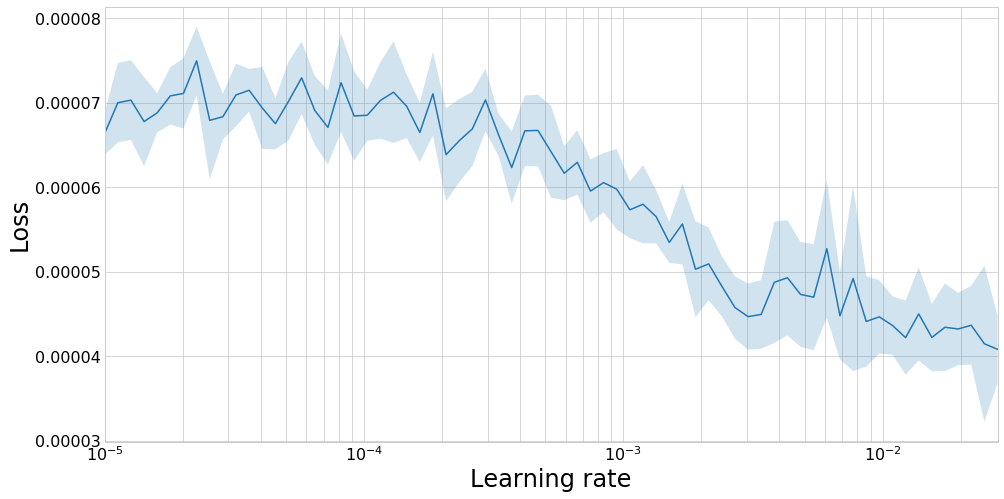

______________________________________



In [6]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

## Train classifier

Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 3.8324186580732575e-05
2 New best found: 3.7469157104559623e-05
3 New best found: 3.6876136355998674e-05
4 New best found: 3.543037565955778e-05
6 New best found: 3.5032572314542355e-05
7 New best found: 3.4872763021548655e-05
8 New best found: 3.485711923319024e-05
9 New best found: 3.439738119348264e-05
11 New best found: 3.428611103207681e-05
12 New best found: 3.402505283530772e-05
14 New best found: 3.4012628727319535e-05
16 New best found: 3.376790851863805e-05
19 New best found: 3.370774209442384e-05
20 New best found: 3.35804229767278e-05
27 New best found: 3.336912276656435e-05
28 New best found: 3.3106097036002034e-05
41 New best found: 3.300400146347483e-05
47 New best found: 3.298249243327946e-05
48 New best found: 3.279903765427508e-05
50 New best found: 3.2782877783929946e-05
65 New best found: 3.268424417499816e-05
67 New best found: 3.264187868025979e-05
74 New best fou

model is 52 epochs old
new model is 52 epochs old
177 swa loss 3.1989386471549595e-05, default loss 3.263039902858726e-05
model is 53 epochs old
new model is 53 epochs old
178 swa loss 3.199024186805119e-05, default loss 3.267771812217985e-05
model is 54 epochs old
new model is 54 epochs old
179 swa loss 3.199092401170931e-05, default loss 3.251810382755326e-05
model is 55 epochs old
new model is 55 epochs old
180 swa loss 3.1992030028618285e-05, default loss 3.2476255298136234e-05
model is 56 epochs old
new model is 56 epochs old
181 swa loss 3.199640053619395e-05, default loss 3.309348509018317e-05
model is 57 epochs old
new model is 57 epochs old
182 swa loss 3.19973927165688e-05, default loss 3.257077176974382e-05
model is 58 epochs old
new model is 58 epochs old
183 swa loss 3.199624718649516e-05, default loss 3.251046922379379e-05
model is 59 epochs old
new model is 59 epochs old
184 swa loss 3.199607149785605e-05, default loss 3.2652625145449694e-05
model is 60 epochs old
new mo

130 swa loss 3.214890204946534e-05, default loss 3.312464073326017e-05
model is 6 epochs old
new model is 6 epochs old
131 swa loss 3.2096237217294424e-05, default loss 3.245976444702845e-05
131 New best found: 3.2096237217294424e-05
model is 7 epochs old
new model is 7 epochs old
132 swa loss 3.2064004680183694e-05, default loss 3.2496097415766326e-05
132 New best found: 3.2064004680183694e-05
model is 8 epochs old
new model is 8 epochs old
133 swa loss 3.204140049105444e-05, default loss 3.2392194665752225e-05
133 New best found: 3.204140049105444e-05
model is 9 epochs old
new model is 9 epochs old
134 swa loss 3.200866307380515e-05, default loss 3.229342337970108e-05
134 New best found: 3.200866307380515e-05
model is 10 epochs old
new model is 10 epochs old
135 swa loss 3.2002782273344534e-05, default loss 3.265169935792821e-05
135 New best found: 3.2002782273344534e-05
model is 11 epochs old
new model is 11 epochs old
136 swa loss 3.198393601239854e-05, default loss 3.2450451811256

36 New best found: 3.3379792061331934e-05
41 New best found: 3.3291452745224933e-05
42 New best found: 3.3267010698161404e-05
43 New best found: 3.318863730931382e-05
47 New best found: 3.310242308498791e-05
50 New best found: 3.298065100044521e-05
51 New best found: 3.297895171866064e-05
63 New best found: 3.297047908017859e-05
73 New best found: 3.29077912616663e-05
79 New best found: 3.2796822103466326e-05
80 New best found: 3.2665080809474726e-05
105 New best found: 3.2648968780449806e-05
111 New best found: 3.254288623033123e-05
SWA beginning
model is 0 epochs old
125 swa loss 3.286724481446429e-05, default loss 3.286724481446429e-05
model is 1 epochs old
new model is 1 epochs old
126 swa loss 3.248433646011354e-05, default loss 3.265000299155438e-05
126 New best found: 3.248433646011354e-05
model is 2 epochs old
new model is 2 epochs old
127 swa loss 3.2303915870268574e-05, default loss 3.286839669669158e-05
127 New best found: 3.2303915870268574e-05
model is 3 epochs old
new mod

model is 56 epochs old
new model is 56 epochs old
181 swa loss 3.208269024058689e-05, default loss 3.234593507698192e-05
181 New best found: 3.208269024058689e-05
model is 57 epochs old
new model is 57 epochs old
182 swa loss 3.2080301648719096e-05, default loss 3.279349099919186e-05
182 New best found: 3.2080301648719096e-05
model is 58 epochs old
new model is 58 epochs old
183 swa loss 3.208240979792004e-05, default loss 3.269380196174549e-05
model is 59 epochs old
new model is 59 epochs old
184 swa loss 3.20824997871653e-05, default loss 3.278712431106004e-05
model is 60 epochs old
new model is 60 epochs old
185 swa loss 3.2081145596734884e-05, default loss 3.283329681364649e-05
model is 61 epochs old
new model is 61 epochs old
186 swa loss 3.207860202256306e-05, default loss 3.249761092257771e-05
186 New best found: 3.207860202256306e-05
model is 62 epochs old
new model is 62 epochs old
187 swa loss 3.207728102021148e-05, default loss 3.2514479193927696e-05
187 New best found: 3.20

238 swa loss 3.20367261875238e-05, default loss 3.33002209575322e-05
model is 114 epochs old
new model is 114 epochs old
239 swa loss 3.20369963204923e-05, default loss 3.2756030273393875e-05
model is 115 epochs old
new model is 115 epochs old
240 swa loss 3.203660302781175e-05, default loss 3.314605614886145e-05
model is 116 epochs old
new model is 116 epochs old
241 swa loss 3.203731959707819e-05, default loss 3.28558837903009e-05
model is 117 epochs old
new model is 117 epochs old
242 swa loss 3.203744041726052e-05, default loss 3.26678676264778e-05
model is 118 epochs old
new model is 118 epochs old
243 swa loss 3.203953602013757e-05, default loss 3.3358612603225595e-05
model is 119 epochs old
new model is 119 epochs old
244 swa loss 3.2039762178234645e-05, default loss 3.3152013615221374e-05
model is 120 epochs old
new model is 120 epochs old
245 swa loss 3.203827932723735e-05, default loss 3.2974461689266116e-05
model is 121 epochs old
new model is 121 epochs old
246 swa loss 3.2

model is 175 epochs old
new model is 175 epochs old
300 swa loss 3.2037006103045456e-05, default loss 3.3081054071353525e-05
model is 176 epochs old
new model is 176 epochs old
301 swa loss 3.203763459371431e-05, default loss 3.329461612014466e-05
model is 177 epochs old
new model is 177 epochs old
302 swa loss 3.2038119747926094e-05, default loss 3.343852207806763e-05
model is 178 epochs old
new model is 178 epochs old
303 swa loss 3.203899675521997e-05, default loss 3.315332642293307e-05
model is 179 epochs old
new model is 179 epochs old
304 swa loss 3.204041684884616e-05, default loss 3.3595376827541636e-05
model is 180 epochs old
new model is 180 epochs old
305 swa loss 3.2041562314138944e-05, default loss 3.34215867594049e-05
model is 181 epochs old
new model is 181 epochs old
306 swa loss 3.2042177025651586e-05, default loss 3.342850636338104e-05
model is 182 epochs old
new model is 182 epochs old
307 swa loss 3.2042392382723206e-05, default loss 3.3015134385430004e-05
model is 

model is 12 epochs old
new model is 12 epochs old
137 swa loss 3.125811304416857e-05, default loss 3.1555559625849125e-05
137 New best found: 3.125811304416857e-05
model is 13 epochs old
new model is 13 epochs old
138 swa loss 3.127180063020205e-05, default loss 3.216898772516288e-05
model is 14 epochs old
new model is 14 epochs old
139 swa loss 3.128086749566137e-05, default loss 3.2630018942290916e-05
model is 15 epochs old
new model is 15 epochs old
140 swa loss 3.1271399406250565e-05, default loss 3.1895336112938824e-05
model is 16 epochs old
new model is 16 epochs old
141 swa loss 3.126528482025606e-05, default loss 3.193202636466594e-05
model is 17 epochs old
new model is 17 epochs old
142 swa loss 3.127271040721098e-05, default loss 3.1947020784718914e-05
model is 18 epochs old
new model is 18 epochs old
143 swa loss 3.1270595811656675e-05, default loss 3.1779727446701145e-05
model is 19 epochs old
new model is 19 epochs old
144 swa loss 3.1256412025686586e-05, default loss 3.15

model is 76 epochs old
new model is 76 epochs old
201 swa loss 3.120919069624506e-05, default loss 3.205010517995106e-05
201 New best found: 3.120919069624506e-05
model is 77 epochs old
new model is 77 epochs old
202 swa loss 3.120982944383286e-05, default loss 3.188871653255774e-05
model is 78 epochs old
new model is 78 epochs old
203 swa loss 3.1211086329858514e-05, default loss 3.1994603759085295e-05
model is 79 epochs old
new model is 79 epochs old
204 swa loss 3.121095878741471e-05, default loss 3.209217607291066e-05
model is 80 epochs old
new model is 80 epochs old
205 swa loss 3.121112920271116e-05, default loss 3.176342363149161e-05
model is 81 epochs old
new model is 81 epochs old
206 swa loss 3.1210863024170975e-05, default loss 3.190213160560233e-05
model is 82 epochs old
new model is 82 epochs old
207 swa loss 3.1212018262885973e-05, default loss 3.2118297512352e-05
model is 83 epochs old
new model is 83 epochs old
208 swa loss 3.12097795693262e-05, default loss 3.199706076

model is 6 epochs old
new model is 6 epochs old
131 swa loss 3.203946257708594e-05, default loss 3.2427778017881795e-05
131 New best found: 3.203946257708594e-05
model is 7 epochs old
new model is 7 epochs old
132 swa loss 3.2017372438713206e-05, default loss 3.235875925020082e-05
132 New best found: 3.2017372438713206e-05
model is 8 epochs old
new model is 8 epochs old
133 swa loss 3.1994102277531055e-05, default loss 3.247498229757184e-05
133 New best found: 3.1994102277531055e-05
model is 9 epochs old
new model is 9 epochs old
134 swa loss 3.201040373096476e-05, default loss 3.289873520043329e-05
model is 10 epochs old
new model is 10 epochs old
135 swa loss 3.200712520774687e-05, default loss 3.249904692784184e-05
model is 11 epochs old
new model is 11 epochs old
136 swa loss 3.201473896115204e-05, default loss 3.296127415378578e-05
model is 12 epochs old
new model is 12 epochs old
137 swa loss 3.201048481132602e-05, default loss 3.28303420348675e-05
model is 13 epochs old
new mode

model is 62 epochs old
new model is 62 epochs old
187 swa loss 3.188034455233719e-05, default loss 3.259096323308768e-05
187 New best found: 3.188034455233719e-05
model is 63 epochs old
new model is 63 epochs old
188 swa loss 3.188216389535228e-05, default loss 3.263034179180977e-05
model is 64 epochs old
new model is 64 epochs old
189 swa loss 3.1885860092006626e-05, default loss 3.3069645200885135e-05
model is 65 epochs old
new model is 65 epochs old
190 swa loss 3.1887761010148095e-05, default loss 3.277477433584863e-05
model is 66 epochs old
new model is 66 epochs old
191 swa loss 3.188812056105235e-05, default loss 3.298180883648456e-05
model is 67 epochs old
new model is 67 epochs old
192 swa loss 3.188999758931459e-05, default loss 3.312996046443004e-05
model is 68 epochs old
new model is 68 epochs old
193 swa loss 3.188818686030572e-05, default loss 3.229679185897112e-05
model is 69 epochs old
new model is 69 epochs old
194 swa loss 3.18854795252264e-05, default loss 3.23029127

model is 124 epochs old
new model is 124 epochs old
249 swa loss 3.186410642156261e-05, default loss 3.2589692433248275e-05
249 New best found: 3.186410642156261e-05
model is 125 epochs old
new model is 125 epochs old
250 swa loss 3.186284687035368e-05, default loss 3.2460145068034765e-05
250 New best found: 3.186284687035368e-05
model is 126 epochs old
new model is 126 epochs old
251 swa loss 3.1864775640133303e-05, default loss 3.2826505912817085e-05
model is 127 epochs old
new model is 127 epochs old
252 swa loss 3.186450365392375e-05, default loss 3.257973051731824e-05
model is 128 epochs old
new model is 128 epochs old
253 swa loss 3.186559908644995e-05, default loss 3.2687013159738856e-05
model is 129 epochs old
new model is 129 epochs old
254 swa loss 3.186535470886156e-05, default loss 3.2660271968052255e-05
model is 130 epochs old
new model is 130 epochs old
255 swa loss 3.18674847818329e-05, default loss 3.29986754055426e-05
model is 131 epochs old
new model is 131 epochs old

128 swa loss 3.2667361074709334e-05, default loss 3.3698275465576444e-05
model is 4 epochs old
new model is 4 epochs old
129 swa loss 3.263743898132816e-05, default loss 3.3011299069039525e-05
model is 5 epochs old
new model is 5 epochs old
130 swa loss 3.262721560895443e-05, default loss 3.316654077207204e-05
130 New best found: 3.262721560895443e-05
model is 6 epochs old
new model is 6 epochs old
131 swa loss 3.2609893732296766e-05, default loss 3.307685415347805e-05
131 New best found: 3.2609893732296766e-05
model is 7 epochs old
new model is 7 epochs old
132 swa loss 3.2608437714225146e-05, default loss 3.310069234867114e-05
132 New best found: 3.2608437714225146e-05
model is 8 epochs old
new model is 8 epochs old
133 swa loss 3.2602072203007994e-05, default loss 3.313081365049584e-05
133 New best found: 3.2602072203007994e-05
model is 9 epochs old
new model is 9 epochs old
134 swa loss 3.2591826537100136e-05, default loss 3.3388494592509234e-05
134 New best found: 3.25918265371001

model is 61 epochs old
new model is 61 epochs old
186 swa loss 3.25045088888146e-05, default loss 3.3082370928605085e-05
186 New best found: 3.25045088888146e-05
model is 62 epochs old
new model is 62 epochs old
187 swa loss 3.250673440779792e-05, default loss 3.34143927480909e-05
model is 63 epochs old
new model is 63 epochs old
188 swa loss 3.250544317270396e-05, default loss 3.300952126592165e-05
model is 64 epochs old
new model is 64 epochs old
189 swa loss 3.2506022180314175e-05, default loss 3.330601196939824e-05
model is 65 epochs old
new model is 65 epochs old
190 swa loss 3.250144354533404e-05, default loss 3.316208992764587e-05
190 New best found: 3.250144354533404e-05
model is 66 epochs old
new model is 66 epochs old
191 swa loss 3.250123717734823e-05, default loss 3.320563928427873e-05
191 New best found: 3.250123717734823e-05
model is 67 epochs old
new model is 67 epochs old
192 swa loss 3.25036627924419e-05, default loss 3.338684621558059e-05
model is 68 epochs old
new mo

model is 125 epochs old
new model is 125 epochs old
250 swa loss 3.250487252516905e-05, default loss 3.366713218129007e-05
model is 126 epochs old
new model is 126 epochs old
251 swa loss 3.2505288245738484e-05, default loss 3.328816050343448e-05
model is 127 epochs old
new model is 127 epochs old
252 swa loss 3.250745007389924e-05, default loss 3.3606110833352434e-05
model is 128 epochs old
new model is 128 epochs old
253 swa loss 3.250693455483997e-05, default loss 3.346087849058677e-05
model is 129 epochs old
new model is 129 epochs old
254 swa loss 3.25083437084686e-05, default loss 3.362976782227633e-05
Early stopping after 254 epochs
Score is: {'loss': 3.249272352986736e-05, 'wAUC': 0.06570820500144037, 'AUC': 0.10129209278257634, 'AMS': 4.2803305528616935, 'cut': 0.9885446429252625}
Fold took 384.839s

Running fold 7 / 10
1 New best found: 3.738203302054899e-05
2 New best found: 3.54524220325402e-05
3 New best found: 3.534022540989099e-05
4 New best found: 3.427507450105622e-05


model is 43 epochs old
new model is 43 epochs old
168 swa loss 3.0602387615363115e-05, default loss 3.1082705142034686e-05
168 New best found: 3.0602387615363115e-05
model is 44 epochs old
new model is 44 epochs old
169 swa loss 3.0596544418949636e-05, default loss 3.132216454978334e-05
169 New best found: 3.0596544418949636e-05
model is 45 epochs old
new model is 45 epochs old
170 swa loss 3.059244555188343e-05, default loss 3.092366584023694e-05
170 New best found: 3.059244555188343e-05
model is 46 epochs old
new model is 46 epochs old
171 swa loss 3.059103732666699e-05, default loss 3.1164240982616324e-05
171 New best found: 3.059103732666699e-05
model is 47 epochs old
new model is 47 epochs old
172 swa loss 3.0590037814545213e-05, default loss 3.110002036264632e-05
172 New best found: 3.0590037814545213e-05
model is 48 epochs old
new model is 48 epochs old
173 swa loss 3.058428373769857e-05, default loss 3.0825006930535895e-05
173 New best found: 3.058428373769857e-05
model is 49 e

228 swa loss 3.058734524529427e-05, default loss 3.1690976167737975e-05
model is 104 epochs old
new model is 104 epochs old
229 swa loss 3.058928598766215e-05, default loss 3.1451661711616905e-05
model is 105 epochs old
new model is 105 epochs old
230 swa loss 3.059208230115473e-05, default loss 3.187822622858221e-05
model is 106 epochs old
new model is 106 epochs old
231 swa loss 3.059358016762417e-05, default loss 3.145212185627315e-05
model is 107 epochs old
new model is 107 epochs old
232 swa loss 3.059381839411799e-05, default loss 3.124516528914683e-05
model is 108 epochs old
new model is 108 epochs old
233 swa loss 3.0595227020967286e-05, default loss 3.153370710497256e-05
model is 109 epochs old
new model is 109 epochs old
234 swa loss 3.0596336261805845e-05, default loss 3.150168599386234e-05
model is 110 epochs old
new model is 110 epochs old
235 swa loss 3.0598370541702025e-05, default loss 3.200790366245201e-05
model is 111 epochs old
new model is 111 epochs old
236 swa los

model is 31 epochs old
new model is 31 epochs old
156 swa loss 3.215130547310836e-05, default loss 3.284585407743554e-05
156 New best found: 3.215130547310836e-05
model is 32 epochs old
new model is 32 epochs old
157 swa loss 3.2147751677292766e-05, default loss 3.268960001911766e-05
157 New best found: 3.2147751677292766e-05
model is 33 epochs old
new model is 33 epochs old
158 swa loss 3.214601140945576e-05, default loss 3.30008565639909e-05
158 New best found: 3.214601140945576e-05
model is 34 epochs old
new model is 34 epochs old
159 swa loss 3.214645353375327e-05, default loss 3.2957575222789305e-05
model is 35 epochs old
new model is 35 epochs old
160 swa loss 3.214436692752335e-05, default loss 3.263632746609514e-05
160 New best found: 3.214436692752335e-05
model is 36 epochs old
new model is 36 epochs old
161 swa loss 3.214389965407607e-05, default loss 3.285024566603557e-05
161 New best found: 3.214389965407607e-05
model is 37 epochs old
new model is 37 epochs old
162 swa loss

model is 92 epochs old
new model is 92 epochs old
217 swa loss 3.212445491870854e-05, default loss 3.286505169378346e-05
217 New best found: 3.212445491870854e-05
model is 93 epochs old
new model is 93 epochs old
218 swa loss 3.212407101093995e-05, default loss 3.278754022866122e-05
218 New best found: 3.212407101093995e-05
model is 94 epochs old
new model is 94 epochs old
219 swa loss 3.212464404808402e-05, default loss 3.292783525451977e-05
model is 95 epochs old
new model is 95 epochs old
220 swa loss 3.212756289085385e-05, default loss 3.301445227348992e-05
model is 96 epochs old
new model is 96 epochs old
221 swa loss 3.2129493683210025e-05, default loss 3.3139615090209725e-05
model is 97 epochs old
new model is 97 epochs old
222 swa loss 3.2129412915814764e-05, default loss 3.3137947568806e-05
model is 98 epochs old
new model is 98 epochs old
223 swa loss 3.213146380431091e-05, default loss 3.2897542919861995e-05
model is 99 epochs old
new model is 99 epochs old
224 swa loss 3.21

model is 5 epochs old
new model is 5 epochs old
130 swa loss 3.2828990689858604e-05, default loss 3.325686243292459e-05
130 New best found: 3.2828990689858604e-05
model is 6 epochs old
new model is 6 epochs old
131 swa loss 3.276159423302505e-05, default loss 3.295219729989603e-05
131 New best found: 3.276159423302505e-05
model is 7 epochs old
new model is 7 epochs old
132 swa loss 3.270012743243304e-05, default loss 3.308960919321482e-05
132 New best found: 3.270012743243304e-05
model is 8 epochs old
new model is 8 epochs old
133 swa loss 3.26697222746369e-05, default loss 3.306770468961122e-05
133 New best found: 3.26697222746369e-05
model is 9 epochs old
new model is 9 epochs old
134 swa loss 3.266358459145809e-05, default loss 3.3087383638441825e-05
134 New best found: 3.266358459145809e-05
model is 10 epochs old
new model is 10 epochs old
135 swa loss 3.265530118330205e-05, default loss 3.3258289970969734e-05
135 New best found: 3.265530118330205e-05
model is 11 epochs old
new mod

194 swa loss 3.266155624063994e-05, default loss 3.32550856792926e-05
model is 70 epochs old
new model is 70 epochs old
195 swa loss 3.266185532582838e-05, default loss 3.3338994970682896e-05
model is 71 epochs old
new model is 71 epochs old
196 swa loss 3.266202670720992e-05, default loss 3.3223733989954784e-05
model is 72 epochs old
new model is 72 epochs old
197 swa loss 3.266314171342463e-05, default loss 3.3525839826448654e-05
model is 73 epochs old
new model is 73 epochs old
198 swa loss 3.2661191648912565e-05, default loss 3.344234682341232e-05
model is 74 epochs old
new model is 74 epochs old
199 swa loss 3.266429180569746e-05, default loss 3.3719613659345785e-05
model is 75 epochs old
new model is 75 epochs old
200 swa loss 3.266665882180019e-05, default loss 3.330813729882082e-05
model is 76 epochs old
new model is 76 epochs old
201 swa loss 3.2669409485224674e-05, default loss 3.343364564180511e-05
model is 77 epochs old
new model is 77 epochs old
202 swa loss 3.267398293083

model is 38 epochs old
new model is 38 epochs old
163 swa loss 3.075359448852105e-05, default loss 3.1079082546086284e-05
163 New best found: 3.075359448852105e-05
model is 39 epochs old
new model is 39 epochs old
164 swa loss 3.075162027689964e-05, default loss 3.1327635038132716e-05
164 New best found: 3.075162027689964e-05
model is 40 epochs old
new model is 40 epochs old
165 swa loss 3.0747260666731807e-05, default loss 3.141161172681408e-05
165 New best found: 3.0747260666731807e-05
model is 41 epochs old
new model is 41 epochs old
166 swa loss 3.074821614269159e-05, default loss 3.138115568433786e-05
model is 42 epochs old
new model is 42 epochs old
167 swa loss 3.074883587626512e-05, default loss 3.1723702430540404e-05
model is 43 epochs old
new model is 43 epochs old
168 swa loss 3.0742758723258074e-05, default loss 3.135822166856774e-05
168 New best found: 3.0742758723258074e-05
model is 44 epochs old
new model is 44 epochs old
169 swa loss 3.073882968977469e-05, default loss 

model is 101 epochs old
new model is 101 epochs old
226 swa loss 3.0723373936820646e-05, default loss 3.137792397202532e-05
model is 102 epochs old
new model is 102 epochs old
227 swa loss 3.0723504268652934e-05, default loss 3.155130188530595e-05
model is 103 epochs old
new model is 103 epochs old
228 swa loss 3.072365495981449e-05, default loss 3.174101478220247e-05
model is 104 epochs old
new model is 104 epochs old
229 swa loss 3.072453921650443e-05, default loss 3.160373782981083e-05
Early stopping after 229 epochs
Score is: {'loss': 3.071672455570552e-05, 'wAUC': 0.059395744305618114, 'AUC': 0.09543328616056068, 'AMS': 4.0630329581719415, 'cut': 0.9754408597946167}
Fold took 363.136s


______________________________________
Training finished
Cross-validation took 3800.511s 


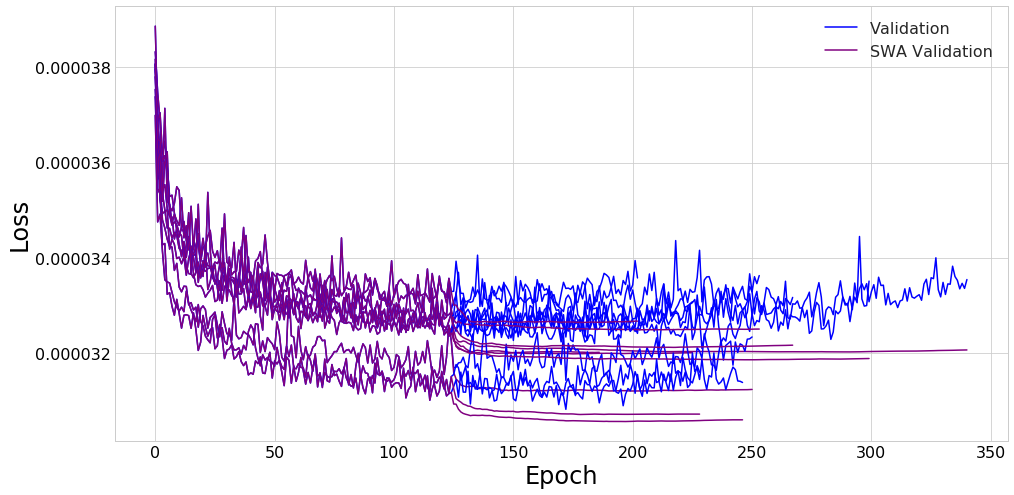

Mean loss = 3.18e-05 +- 2e-07
Mean wAUC = 0.0633 +- 0.0008
Mean AUC = 0.0985 +- 0.0009
Mean AMS = 4.04 +- 0.07
Mean cut = 0.97 +- 0.006
______________________________________



<Figure size 432x288 with 0 Axes>

In [7]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'compileArgs':{**compileArgs, 'lr':2e-3}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          swaStart=125, swaRenewal=-1,
                                          patience=patience, verbose=1, amsSize=250000)

Once SWA is activated at epoch 125, we find that the validation loss goes through a rapid decrease followed by a plateau with large suppression of the statistical fluctuations.

Comparing to 5_Model_Data_Augmentation the metrics are mostly the same, except for the AMS which moves from3.98 to 4.04.

## Construct ensemble

In [8]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [9]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 6 with loss = 3.056904335753643e-05
Model 1 is 9 with loss = 3.071672455570552e-05
Model 2 is 3 with loss = 3.120919069624506e-05
Model 3 is 4 with loss = 3.186284687035368e-05
Model 4 is 1 with loss = 3.198194178443449e-05
Model 5 is 0 with loss = 3.1988215248678005e-05
Model 6 is 2 with loss = 3.202857282279059e-05
Model 7 is 7 with loss = 3.212407101093995e-05
Model 8 is 5 with loss = 3.249272352986736e-05
Model 9 is 8 with loss = 3.2645716380682534e-05


## Response on validation data with TTA

In [10]:
valData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'val.hdf5', "r+"), inputPipe=inputPipe,
                                  rotate = True, reflect = True, augRotMult=8)

In [11]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.01391659113280475s per sample

Predicting batch 2 out of 10
Prediction took 0.012305215643905102s per sample

Predicting batch 3 out of 10
Prediction took 0.0121675153426826s per sample

Predicting batch 4 out of 10
Prediction took 0.012166589914634823s per sample

Predicting batch 5 out of 10
Prediction took 0.012019737253896892s per sample

Predicting batch 6 out of 10
Prediction took 0.011995233291387557s per sample

Predicting batch 7 out of 10
Prediction took 0.012182317556254567s per sample

Predicting batch 8 out of 10
Prediction took 0.011865544037148356s per sample

Predicting batch 9 out of 10
Prediction took 0.012033153799176216s per sample

Predicting batch 10 out of 10
Prediction took 0.012129837618768215s per sample



In [12]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.9032920169789936, weighted 0.9360693746679931


In [13]:
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded


(3.9942355961600824, 0.96019024)

In [14]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=4.0+-0.2, at mean cut of 0.961+-0.008
Exact mean cut 0.9606163307325915, corresponds to AMS of 3.9670679002860356
CPU times: user 2.58 s, sys: 15.1 s, total: 17.6 s
Wall time: 2min 9s


(4.0, 0.961)

In the validation metrics we also find improvement over 5_Model_Data_Augmentation: overallAMS moves from 3.97 to 3.99, and AMS corresponding to mean cut increases to 3.97 from 3.91.

# Test scoring

In [15]:
testData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'testing.hdf5', "r+"), inputPipe=inputPipe,
                                   rotate = True, reflect = True, augRotMult=8)

In [16]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.011936514278721402s per sample

Predicting batch 2 out of 10
Prediction took 0.01206147660294717s per sample

Predicting batch 3 out of 10
Prediction took 0.012110572331551123s per sample

Predicting batch 4 out of 10
Prediction took 0.012047166942347858s per sample

Predicting batch 5 out of 10
Prediction took 0.01204522031410174s per sample

Predicting batch 6 out of 10
Prediction took 0.012004600540413099s per sample

Predicting batch 7 out of 10
Prediction took 0.01202152247525413s per sample

Predicting batch 8 out of 10
Prediction took 0.012035000745901329s per sample

Predicting batch 9 out of 10
Prediction took 0.01231693161666732s per sample

Predicting batch 10 out of 10
Prediction took 0.012164079189165072s per sample

CPU times: user 2h, sys: 10min 39s, total: 2h 10min 39s
Wall time: 1h 50min 40s


In [17]:
scoreTestOD(testData.source, 0.9606163307325915)

Public:Private AMS: 3.6798281799107344 : 3.7847099714589465


(3.6798281799107344, 3.7847099714589465)

Unfortunately, applying the cut to the test data shows an improvement in the public score (3.65->3.68) but a large decrease in private score (3.82->3.79)

# Save/Load

In [5]:
name = "weights/Swish_SWA-125"

In [19]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

In [6]:
ensemble, weights, compileArgs, _, _ = loadEnsemble(name)